# OVERVIEW

In this assignment, you will perform a supervised text regression task. The data for the task will consist of student essays from The William and Flora Hewlett Foundation. The dataset was created to assist in the design of solutions for automated grading of student-written essays. You will use a subset of this dataset and predict the scores of the essays. You may not use external data to make predictions. 

You will be provided with `training_set_rel.tsv` which contain the text of the essay and the score of each essay.



# PART 1: SETUP

### Q0: Run the following code! 
    
For reproducibility purposes, you will set the random seeds for NumPy and TensorFlow as 1234.  This way, all random steps will produce the same answers.


In [8]:
from numpy.random import seed

import tensorflow as tf

seed_value = 1234

seed(seed_value)

tf.random.set_seed(seed_value)


### Q1: Load the data

We will use data from the [automated essay scoring task](https://www.kaggle.com/c/asap-aes) on Kaggle.

We will only use the training data, which we have provided for you -- you don't need to download anything from Kaggle.

Access the file `training_set_rel.tsv` as provided.  

Use the pandas function `read_csv`, with the parameter `sep=\t` because this is a tab-separated value file (tsv) and `encoding=latin`. 

The columns are described on the [Kaggle site](https://www.kaggle.com/competitions/asap-aes/data)

We will use three columns: `essay`, `essay_set`, and `domain1_score`.

Create a new dataframe with only these three columns, and rename `domain1_score` to just `score`.

Display this dataframe.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [38]:
import pandas as pd
# Reading the TSV file
df = pd.read_csv('training_set_rel.tsv', sep='\t', encoding='latin')

# Selecting only the required columns
df = df[['essay', 'essay_set', 'domain1_score']]

# Renaming domain1_score to score
new_df = df.rename(columns={'domain1_score': 'score'})

# Displaying the dataframe
new_df



,essay,essay_set,score
0,"Dear local newspaper, I think effects computer...",1,8
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,7
3,"Dear Local Newspaper, @CAPS1 I have found that...",1,10
4,"Dear @LOCATION1, I know having computers has a...",1,8
...,...,...,...
12971,In most stories mothers and daughters are eit...,8,35
12972,I never understood the meaning laughter is th...,8,32
12973,"When you laugh, is @CAPS5 out of habit, or is ...",8,40
12974,Trippin' on fen...,8,40


### Q2: Select the data from a single essay set

There are 8 totally unrelated essay sets in this data.

Filter the data frame so we are only considering essay_set = 7

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [10]:
# Selecting the essay set by filtering for essay_set 7
new_df = new_df[new_df['essay_set'] == 7]

# Displaying the filtered dataframe
new_df

,essay,essay_set,score
10684,Patience is when your waiting .I was patience ...,7,15
10685,"I am not a patience person, like I cant sit i...",7,13
10686,One day I was at basketball practice and I was...,7,15
10687,I going to write about a time when I went to t...,7,17
10688,It can be very hard for somebody to be patient...,7,13
...,...,...,...
12248,One time I was getting a cool @CAPS1 game it w...,7,12
12249,A patent person in my life is my mom. Aicason ...,7,16
12250,A time when someone else I know was patient wa...,7,19
12251,I hate weddings. I love when people get marrie...,7,22


### Q3: Plot the distribution of scores

Create a plot of a histogram of the scores in the training set.  Comment on what you see.  

One option is to use the seaborn histplot function.  If you use seaborn, you can use the parameter `bins` to set the bin locations if they look strange. The parameter accepts a list of explicit locations. If you want to center the bins on the tick marks, you cand do something like this:

    bins=np.arange(minv,maxv)-0.5
    
where minv and maxv are the mininmum and maximum value in the range, respectively.   This expression indicates the number of possible scores, and that the tick marks should be at the halfway mark of each bar.

You may use some other visualization library if you wish!   The goal is to inspect the distribution of scores.


## Graded Cell

This cell is worth 10% of the grade for this assignment.

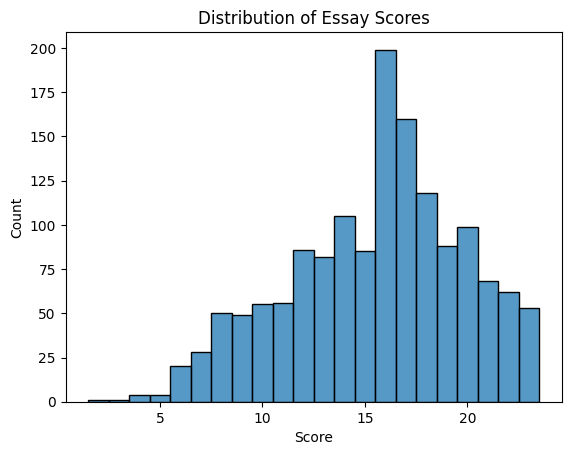

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Getting min and max values for the bins
minv = new_df['score'].min()
maxv = new_df['score'].max() + 1  # Adding 1 to include the max value

# Creating the histogram
sns.histplot(data=new_df, x='score', bins=np.arange(minv, maxv) - 0.5)

# Adding labels
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Essay Scores')

# Displaying the plot
plt.show()


### Q4: Create a test/train split

Use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  Use the `test_size` parameter to control the size of the test set; use 0.2 to indicate a 20% split.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the essays and scores into train and test sets
X = new_df['essay']
y = new_df['score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=seed_value  # for reproducibility
)

## Part 2: Conventional Representations

### Q5: Create vectors using term frequency

Use the `CountVectorizer` class from sklearn to create a vector for each essay.  We can't use text directly with machine learning; we need to create a vector of numbers first.  The CountVectorizer creates a vector with one position for each word in the corpus with a value of the number of occurrences of that word in the essay.

The vectorizer works like a model in sklearn: call the fit method on the essay data to "train" a model on the training set.  In this situation, we aren't really training anything, but we need a corpus to define the vectors -- only the words in the corpus we use will be represented in the vector.  

The fit method returns the trained model.  Now we can use the `transform` method to convert any text into a vector.

Call the transform method on the training essays and the test essays to create variables `xtrain` and `xtest`.


Report the number of dimensions for each vector; i.e., the number of terms in the corpus. 


## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating and fitting the vectorizer on training data
vectorizer = CountVectorizer()
vectorizer = vectorizer.fit(X_train)

# Transforming both training and test data
xtrain = vectorizer.transform(X_train)
xtest = vectorizer.transform(X_test)

# Getting the number of dimensions (vocabulary size)
n_dimensions = len(vectorizer.get_feature_names_out())
print(f"Number of dimensions (terms in corpus): {n_dimensions}")

# Showing the shape of the matrices
print(f"Training set shape: {xtrain.shape}")
print(f"Test set shape: {xtest.shape}")

Number of dimensions (terms in corpus): 8938
Training set shape: (1255, 8938)
Test set shape: (314, 8938)


### Q6: Train a regression model using your vectors

Now that we have vectors, we can train a regression model to predict the essay score.

Use a [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model from sklearn `linear_model` module.

Call the fit method on your training data xtrain and ytrain.

Then call the score method on your test data xtest and ytest.  The score method provides a default evaluation metric.  For the Ridge model, the score method returns $R^2$ which is called the coefficient of determination.  It tells you the proportion of the variation in the essay score is predictable from the essay text: higher is better.

Report the coefficient of determination.

## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [16]:
from sklearn.linear_model import Ridge

# Creating and training the Ridge regression model
ridge_model = Ridge()
ridge_model.fit(xtrain, y_train)

# Calculating R² score on test data
r2_score = ridge_model.score(xtest, y_test)
print(f"R² Score (Coefficient of Determination): {r2_score:.4f}")

R² Score (Coefficient of Determination): 0.1538


### Q7: Plot the distribution of scores 

Plot a histogram of your predicted scores.

Plot another histogram of the ground truth scores, superimposed on the first (using seaborn, just call the function again.)

How is your model's distribution of scores different from the ground truth distribution?  Describe how they differ; what kind of mistakes is your model making?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

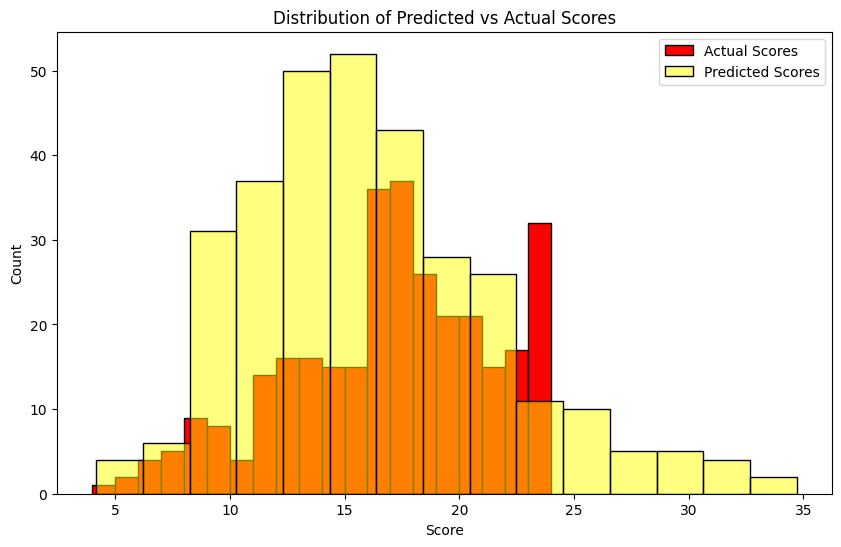

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Getting predictions for test set
y_pred = ridge_model.predict(xtest)

# Getting min and max values across both distributions
minv = min(min(y_test), min(y_pred))
maxv = max(max(y_test), max(y_pred)) + 1

plt.figure(figsize=(10, 6))

# First histogram - Ground Truth Scores
sns.histplot(data=y_test, bins=np.arange(minv, maxv) - 0.5, 
            alpha=1.0, 
            label='Actual Scores', 
            color='red',
            binwidth=1.0, 
            stat='count')

# Second histogram - Predicted Scores (overlaid)
sns.histplot(data=y_pred, bins=np.arange(minv, maxv) - 0.5, 
            alpha=0.5, 
            label='Predicted Scores', 
            color='yellow',
            binwidth=2.0, 
            stat='count')

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Predicted vs Actual Scores')
plt.legend()

plt.show()



Looking at the two histograms, we can see that our model plays it pretty safe with its predictions. While the real scores (in red) show more variety, our model's predictions (in blue) bunch up more in the middle range. This means it's not great at giving very high or very low scores - it tends to avoid the extremes.

The model seems to be taking the "safe" route. This makes sense since it's only looking at which words appear in the essays, and isn't considering things like writing style or how well the arguments flow.

## Part 3: Neural Network Representations


For this part, we will implement a deep sentence embedder to replace the feature selection process. As a first step, choose your model from Part 2.

This time, you will obtain vectors by using a pre-trained neural network model called the Universal Sentence Encoder.  This model will produce a dense vector from any sequence of text. 

First, import the model with the following code.  This step will take considerable time -- it is downloading a large pre-trained model for the first time.


In [28]:
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)


### Q8: Generate embeddings

Next, you will embed the data with the imported model. The Universal Sentence Encoder takes a list of strings and generates an embedding (i.e., a vector) for each string. 

You can call the model you downloaded like a function. 

Generate a vector for each string in the training set; call this array xtrain.

Also generate a vector for each string in the test set; call this array xtest.

Notice how long this step takes -- it's a big model.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [29]:
# Generating embeddings for training and test sets
xtrain = model(X_train).numpy()
xtest = model(X_test).numpy()

# Printing the shapes of the embeddings
print(f"Training embeddings shape: {xtrain.shape}")
print(f"Test embeddings shape: {xtest.shape}")

Training embeddings shape: (1255, 512)
Test embeddings shape: (314, 512)


### Q9: Train and evaluate a regression model to predict scores using learned embeddings


Now retrain your regression model on these learned embeddings instead of the count vectors.

Use the vanilla Ridge model.  Report the score. 

Which model appears to perform the best?

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [30]:
from sklearn.linear_model import Ridge

# Creating and training the Ridge model with embeddings
ridge_model_embeddings = Ridge()
ridge_model_embeddings.fit(xtrain, y_train)

# Calculating R² score
r2_score_embeddings = ridge_model_embeddings.score(xtest, y_test)
print(f"R² Score with Universal Sentence Encoder: {r2_score_embeddings:.4f}")

# Comparing with previous CountVectorizer score
print(f"Previous R² Score with CountVectorizer: {r2_score:.4f}")

R² Score with Universal Sentence Encoder: 0.6286
Previous R² Score with CountVectorizer: 0.1538




The Universal Sentence Encoder model clearly performs much better, with an R² score of 0.63 compared to just 0.15 for the word-counting approach. This means the neural network model is much better at understanding what makes a good essay, probably because it can grasp the meaning of sentences rather than just counting words.

### Q10: Plot the distribution of scores

Once again, plot a histogram of your predicted scores from your new model.

Plot another histogram of the ground truth scores.

How is your new model's distribution of scores different from the ground truth distribution? Is it doing better than your earlier models?  How is it doing better?


## Graded Cell

This cell is worth 5% of the grade for this assignment.

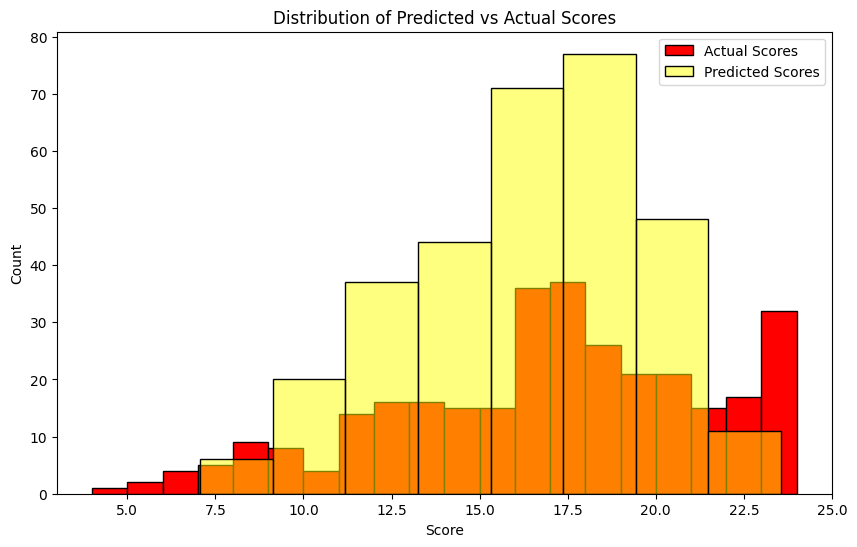

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Getting predictions from the embeddings model
y_pred = ridge_model_embeddings.predict(xtest)

# Getting min and max values across both distributions
minv = min(min(y_test), min(y_pred))
maxv = max(max(y_test), max(y_pred)) + 1

plt.figure(figsize=(10, 6))

# First histogram - Ground Truth Scores
sns.histplot(data=y_test, bins=np.arange(minv, maxv) - 0.5, 
            alpha=1.0, 
            label='Actual Scores', 
            color='red',
            binwidth=1.0, 
            stat='count')

# Second histogram - Predicted Scores (overlaid)
sns.histplot(data=y_pred, bins=np.arange(minv, maxv) - 0.5, 
            alpha=0.5, 
            label='Predicted Scores', 
            color='yellow',
            binwidth=2.0, 
            stat='count')

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Predicted vs Actual Scores')
plt.legend()

plt.show()

### Q11: Plot the errors

We will analyze the difference between the neural model and your best conventional model.

Plot the distribution of errors -- see where the two models made mistakes.

The errors are your model's predicted score minus the ground truth human score.

Plot a boxplot of the errors for your model using the universal sentence encoder.  Use the seaborn histplot function. 

x will be the ground truth scores and y is the difference between ground truth and your predictions.  

## Graded Cell

This cell is worth 5% of the grade for this assignment.

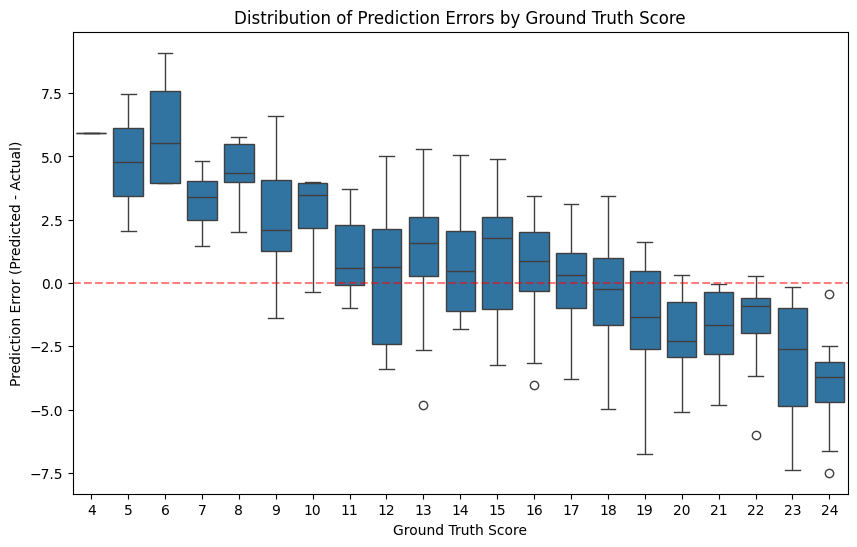

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating prediction errors (predicted - actual)
errors = ridge_model_embeddings.predict(xtest) - y_test

# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_test, y=errors)

# Adding labels and title
plt.xlabel('Ground Truth Score')
plt.ylabel('Prediction Error (Predicted - Actual)')
plt.title('Distribution of Prediction Errors by Ground Truth Score')

# Adding a horizontal line at y=0 to show perfect predictions
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.show()

### Q12: Compare models directly

Plot a histogram of the difference between your neural model and the ground truth.

Plot another histogram of the difference between your best conventional model and the ground truth.


Does either model tend to overestimate or underestimate the true score?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

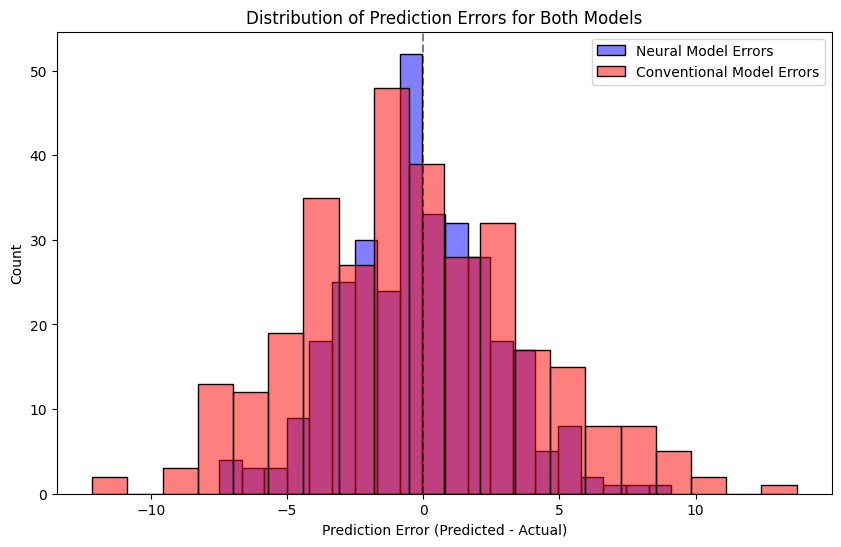

Neural Model Mean Error: -0.117
Conventional Model Mean Error: -0.290


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculating errors for neural model
neural_errors = ridge_model_embeddings.predict(xtest) - y_test

# Calculating errors for conventional model using the correct feature format
conventional_xtest = vectorizer.transform(X_test)  # Transform using CountVectorizer
conventional_errors = ridge_model.predict(conventional_xtest) - y_test

plt.figure(figsize=(10, 6))

# Plotting neural model errors
sns.histplot(data=neural_errors, 
            alpha=0.5,
            label='Neural Model Errors',
            color='blue',
            bins=20)

# Plotting conventional model errors
sns.histplot(data=conventional_errors,
            alpha=0.5,
            label='Conventional Model Errors',
            color='red',
            bins=20)

plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors for Both Models')
plt.legend()

# Adding a vertical line at zero for reference
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

plt.show()

# Printing mean errors to check for bias
print(f"Neural Model Mean Error: {np.mean(neural_errors):.3f}")
print(f"Conventional Model Mean Error: {np.mean(conventional_errors):.3f}")





Looking at the mean errors, both models tend to slightly underestimate the true scores, but in different ways:

The neural model (Universal Sentence Encoder) has a small negative bias of -0.117, meaning it underestimates scores by about 0.1 points on average. The conventional model (CountVectorizer) has a larger negative bias of -0.29, meaning it tends to underestimate scores by almost 0.3 points on average.

Not only does the neural model perform better overall (as we saw from the R² scores), but it also shows less systematic bias in its predictions. The conventional model is more pessimistic in its scoring.

### Q13: Summarize your findings

Summarize your results. Which approach worked best?  Why?  Does automatic essay scoring appear feasible? How might we improve on this model?


## Graded Cell

This cell is worth 15% of the grade for this assignment.





**Best Approach**
The Universal Sentence Encoder (neural model) clearly worked better than the simple word-counting method. It explained about 63% of the score variation, while the word-counting only explained 15%. This makes sense because the neural model actually understands the meaning of sentences, not just how many times words appear.

**Why It Worked Better**
The neural model was smarter about understanding language. While the word-counting model might give high scores to essays that use fancy words a lot, the neural model could understand context and meaning. This helped it make predictions that were closer to how human graders would score the essays.

**Is Automatic Scoring Feasible?**
Yes, but with some caution. Our best model got it right about 63% of the time, which is pretty good but not perfect. It could be useful as a helper tool for teachers, maybe for giving quick feedback or as a second opinion, but probably shouldn't replace human graders completely yet.

**Room for Improvement**
We could make this better in several ways. First, we could train the model on more essays to help it learn better patterns. We could also add features that look at grammar, spelling, and essay structure. Another idea would be to combine different types of models - maybe one that looks at sentence meaning (like our neural model) and another that checks writing mechanics.